In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
import numpy as np
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\Windows10\OneDrive - ust.edu.ph\Ust Engineering\Titles & Certifications\Thinking Machines\Datasets\Annual Per Capita Poverty Threshold (in Pesos).csv")

# Annual Per Capita Poverty Threshold

In [4]:
df.head()

,Unnamed: 0,Variable,Year,province,value,adm_level,region,unit
0,0,Annual Per Capita Poverty Threshold (in Pesos),1991,1st District,NaN,District,NCR,in Pesos
1,1,Annual Per Capita Poverty Threshold (in Pesos),2006,1st District,"15,699",District,NCR,in Pesos
2,2,Annual Per Capita Poverty Threshold (in Pesos),2009,1st District,"19,227",District,NCR,in Pesos
3,3,Annual Per Capita Poverty Threshold (in Pesos),2012,1st District,"20,344",District,NCR,in Pesos
4,4,Annual Per Capita Poverty Threshold (in Pesos),2015,1st District,"25,007",District,NCR,in Pesos


In [11]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Variable - 0.0%
Year - 0.0%
province - 0.0%
value - 0.0%
adm_level - 0.0%
region - 0.0%
unit - 0.0%


In [8]:
df['value'] = df['value'].apply(lambda x: int(x.replace(',', '')))

In [9]:
df['Variable'] = df['Variable'].astype(str)
df['province'] = df['province'].astype(str)
df['value'] = df['value'].astype(int)
df['adm_level'] = df['adm_level'].astype(str)
df['region'] = df['region'].astype(str)

In [10]:
df.dtypes

Variable     object
Year          int64
province     object
value         int32
adm_level    object
region       object
unit         object
dtype: object

In [6]:
df = df.drop('Unnamed: 0', axis=1)
df = df.dropna(subset=['region'])
df = df.dropna(subset=['value'])
df.head()

,Variable,Year,province,value,adm_level,region,unit
1,Annual Per Capita Poverty Threshold (in Pesos),2006,1st District,"15,699",District,NCR,in Pesos
2,Annual Per Capita Poverty Threshold (in Pesos),2009,1st District,"19,227",District,NCR,in Pesos
3,Annual Per Capita Poverty Threshold (in Pesos),2012,1st District,"20,344",District,NCR,in Pesos
4,Annual Per Capita Poverty Threshold (in Pesos),2015,1st District,"25,007",District,NCR,in Pesos
6,Annual Per Capita Poverty Threshold (in Pesos),2006,2nd District,"15,699",District,NCR,in Pesos


In [7]:
df.to_csv('Annual Per Capita Poverty Threshold.csv')

TypeError: __init__() got an unexpected keyword argument 'region'

<Figure size 50000x600 with 0 Axes>

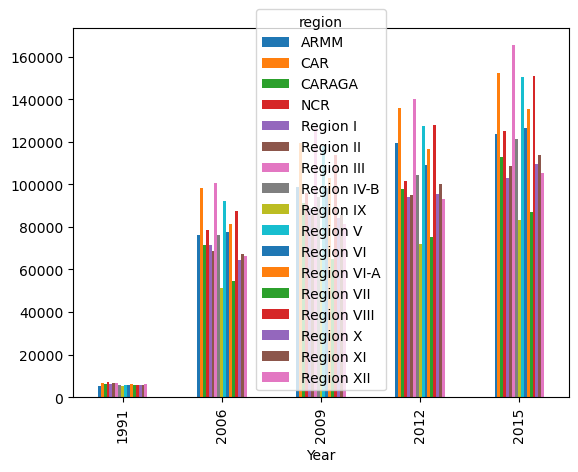

In [35]:
df = df.drop(df[df['region'] == 'Philippines'].index)
# Group the DataFrame by year and region
grouped_df = df.groupby(['Year', 'region'])['value'].sum().unstack()

# Set the figure size
plt.figure(figsize=(500, 6))

# Create a grouped bar chart
ax = grouped_df.plot(kind='bar')
ax.legend(region='lower right')
# Add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Values by Year and Region')

# Display the chart
plt.show()

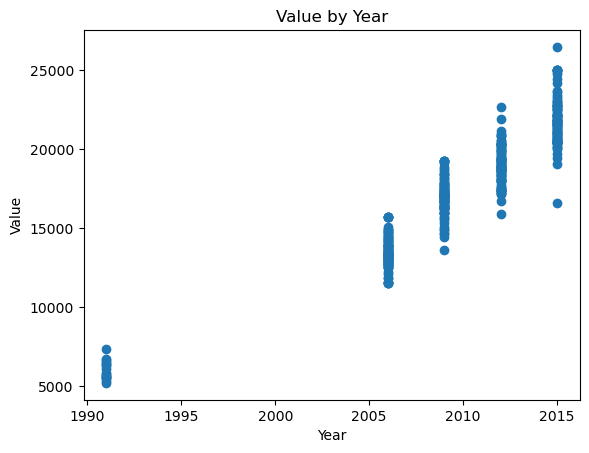

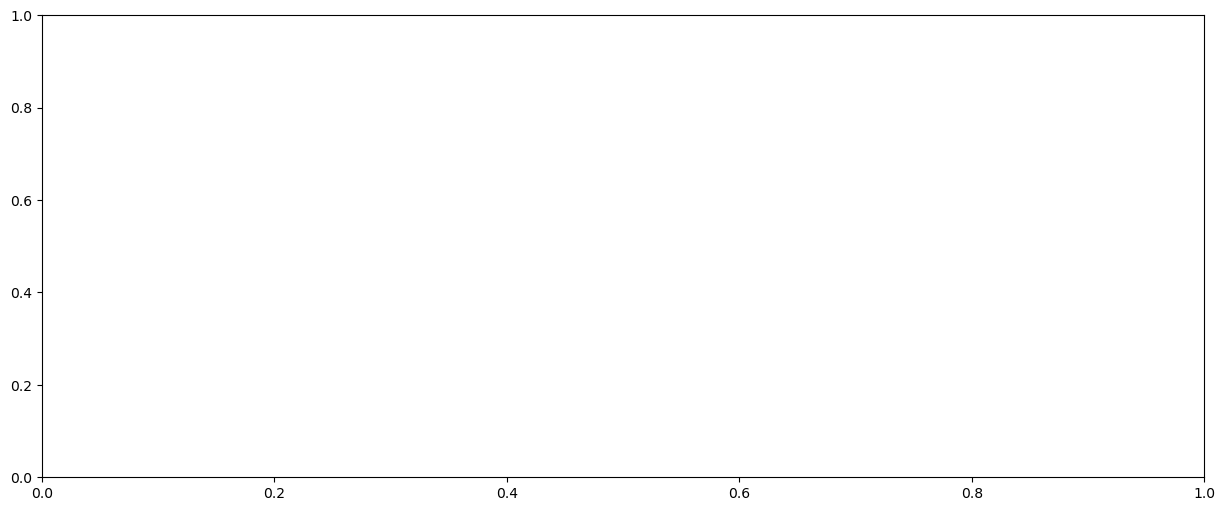

In [36]:
plt.scatter(x=df['Year'], y=df['value'])
plt.title('Value by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.subplots(figsize=(15, 6))

plt.show()

<AxesSubplot:xlabel='Year', ylabel='value'>

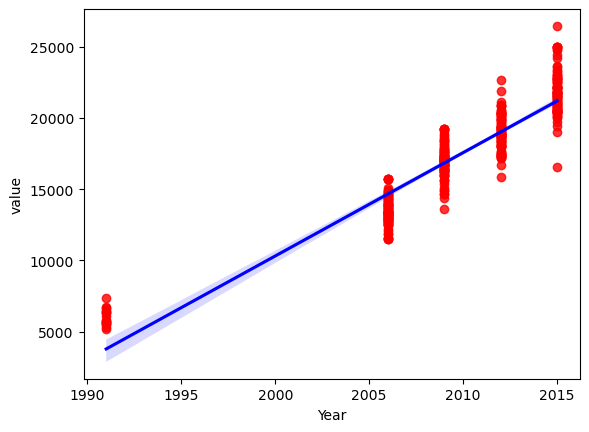

In [37]:
sns.regplot(x='Year', y='value', data=df, scatter_kws={"color":"red"}, line_kws={"color": "blue"})

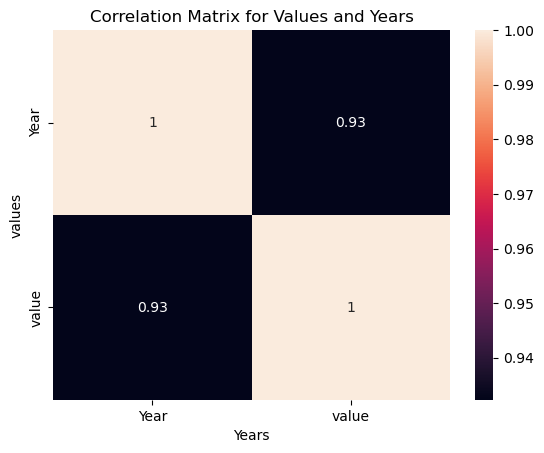

In [43]:
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Values and Years')
plt.xlabel('Years')
plt.ylabel('values')

plt.show()

In [44]:
df.corr(method='pearson')

,Year,value
Year,1.000000,0.932306
value,0.932306,1.000000


# Magnitude of Poor Families

In [13]:
df = pd.read_csv(r"C:\Users\Windows10\OneDrive - ust.edu.ph\Ust Engineering\Titles & Certifications\Thinking Machines\Datasets\Magnitude of Poor Families.csv")

In [14]:
df.head()

,Unnamed: 0,Variable,Year,province,value,adm_level,region,unit
0,10,Magnitude of Poor Families,1991,1st District,NaN,District,NCR,families
1,11,Magnitude of Poor Families,2006,1st District,"9,906",District,NCR,families
2,12,Magnitude of Poor Families,2009,1st District,"12,405",District,NCR,families
3,13,Magnitude of Poor Families,2012,1st District,"14,343",District,NCR,families
4,14,Magnitude of Poor Families,2015,1st District,"12,710",District,NCR,families


In [15]:
df = df.drop('Unnamed: 0', axis=1)
df = df.dropna(subset=['region'])
df = df.dropna(subset=['value'])
df.head()

,Variable,Year,province,value,adm_level,region,unit
1,Magnitude of Poor Families,2006,1st District,"9,906",District,NCR,families
2,Magnitude of Poor Families,2009,1st District,"12,405",District,NCR,families
3,Magnitude of Poor Families,2012,1st District,"14,343",District,NCR,families
4,Magnitude of Poor Families,2015,1st District,"12,710",District,NCR,families
6,Magnitude of Poor Families,2006,2nd District,"28,247",District,NCR,families


In [16]:
df.to_csv('Magnitude of Poor Families.csv')

In [48]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Variable - 0.0%
Year - 0.0%
province - 0.0%
value - 0.0%
adm_level - 0.0%
region - 0.0%
unit - 0.0%


In [49]:
df = df.drop(df[df['region'] == 'Philippines'].index)

In [50]:
df['value'] = df['value'].apply(lambda x: int(x.replace(',', '')))

In [51]:
df['Variable'] = df['Variable'].astype(str)
df['province'] = df['province'].astype(str)
df['value'] = df['value'].astype(int)
df['adm_level'] = df['adm_level'].astype(str)
df['region'] = df['region'].astype(str)

In [52]:
df.dtypes

Variable     object
Year          int64
province     object
value         int32
adm_level    object
region       object
unit         object
dtype: object

TypeError: __init__() got an unexpected keyword argument 'region'

<Figure size 800x600 with 0 Axes>

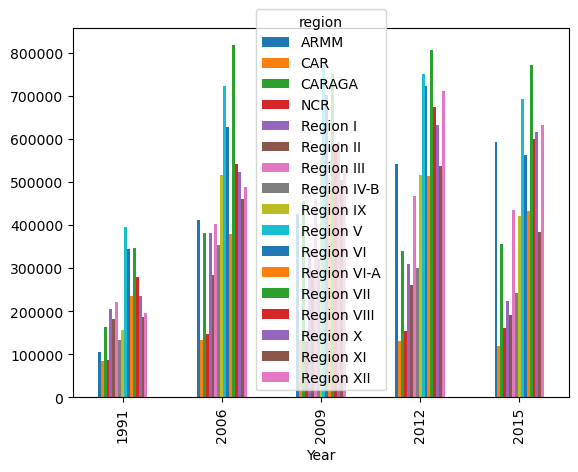

In [53]:
# Group the DataFrame by year and region
grouped_df = df.groupby(['Year', 'region'])['value'].sum().unstack()

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a grouped bar chart
ax = grouped_df.plot(kind='bar')
ax.legend(region='lower right')
# Add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Values by Year and Region')

# Display the chart
plt.show()

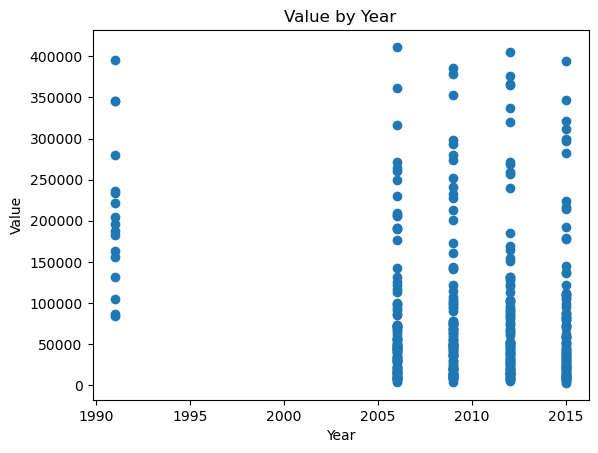

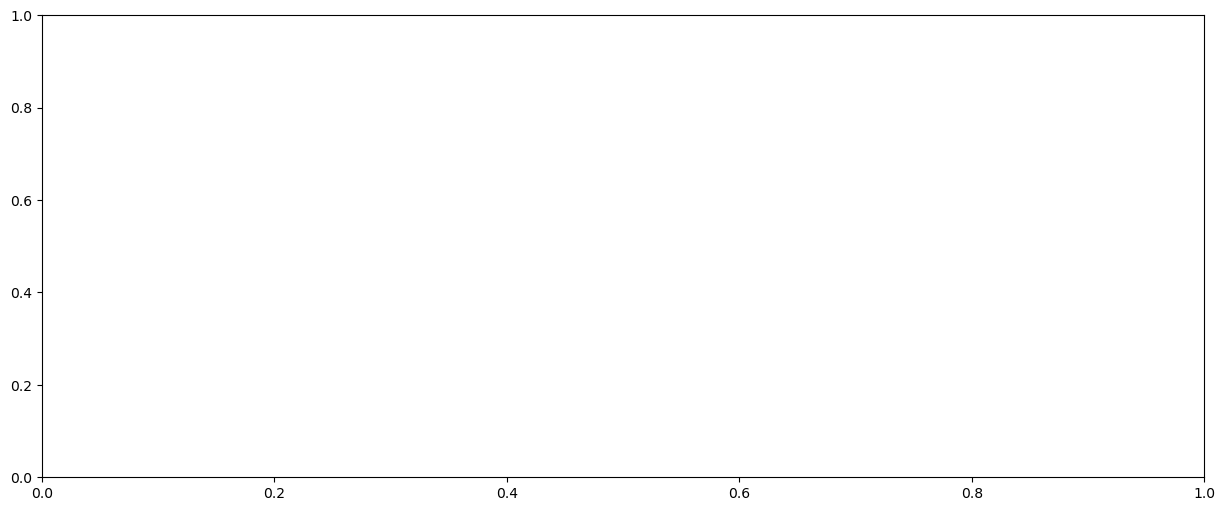

In [54]:
plt.scatter(x=df['Year'], y=df['value'])
plt.title('Value by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.subplots(figsize=(15, 6))

plt.show()

<AxesSubplot:xlabel='Year', ylabel='value'>

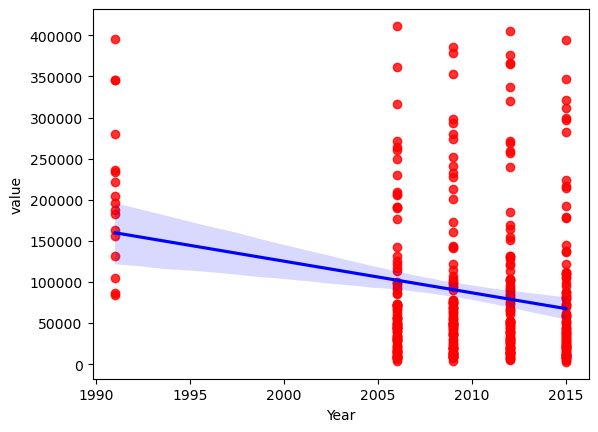

In [55]:
sns.regplot(x='Year', y='value', data=df, scatter_kws={"color":"red"}, line_kws={"color": "blue"})

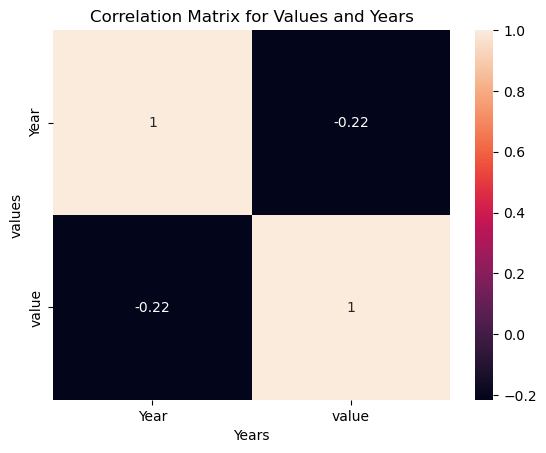

In [56]:
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Values and Years')
plt.xlabel('Years')
plt.ylabel('values')

plt.show()

In [57]:
df.corr(method='pearson')

,Year,value
Year,1.000000,-0.215178
value,-0.215178,1.000000


# Magnitude of Poor Population

In [17]:
df = pd.read_csv(r"C:\Users\Windows10\OneDrive - ust.edu.ph\Ust Engineering\Titles & Certifications\Thinking Machines\Datasets\Magnitude of Poor Population.csv")

In [18]:
df.head()

,Unnamed: 0,Variable,Year,province,value,adm_level,region,unit
0,20,Magnitude of Poor Population,1991,1st District,NaN,District,NCR,population
1,21,Magnitude of Poor Population,2006,1st District,"79,109",District,NCR,population
2,22,Magnitude of Poor Population,2009,1st District,"84,914",District,NCR,population
3,23,Magnitude of Poor Population,2012,1st District,"102,591",District,NCR,population
4,24,Magnitude of Poor Population,2015,1st District,"82,007",District,NCR,population


In [19]:
df = df.drop('Unnamed: 0', axis=1)
df = df.dropna(subset=['region'])
df = df.dropna(subset=['value'])
df = df.drop(df[df['region'] == 'Philippines'].index)
df.head()

,Variable,Year,province,value,adm_level,region,unit
1,Magnitude of Poor Population,2006,1st District,"79,109",District,NCR,population
2,Magnitude of Poor Population,2009,1st District,"84,914",District,NCR,population
3,Magnitude of Poor Population,2012,1st District,"102,591",District,NCR,population
4,Magnitude of Poor Population,2015,1st District,"82,007",District,NCR,population
6,Magnitude of Poor Population,2006,2nd District,"183,449",District,NCR,population


In [20]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Variable - 0.0%
Year - 0.0%
province - 0.0%
value - 0.0%
adm_level - 0.0%
region - 0.0%
unit - 0.0%


In [21]:
df.to_csv('Magnitude of Poor Population.csv')

In [43]:
df['value'] = df['value'].apply(lambda x: int(x.replace(',', '')))

In [44]:
df['Variable'] = df['Variable'].astype(str)
df['province'] = df['province'].astype(str)
df['value'] = df['value'].astype(int)
df['adm_level'] = df['adm_level'].astype(str)
df['region'] = df['region'].astype(str)

In [45]:
df.dtypes

Variable     object
Year          int64
province     object
value         int32
adm_level    object
region       object
unit         object
dtype: object

TypeError: __init__() got an unexpected keyword argument 'region'

<Figure size 50000x600 with 0 Axes>

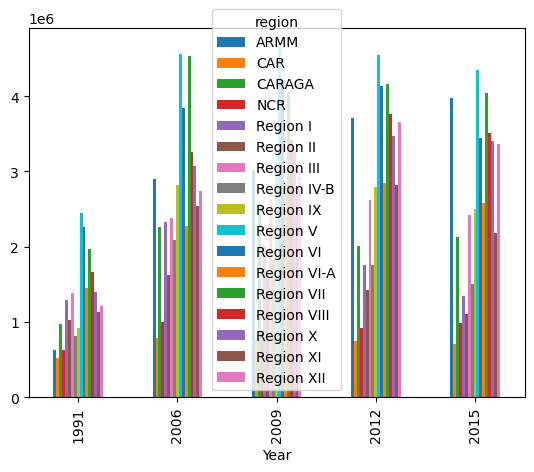

In [46]:
# Group the DataFrame by year and region
grouped_df = df.groupby(['Year', 'region'])['value'].sum().unstack()

# Set the figure size
plt.figure(figsize=(500, 6))

# Create a grouped bar chart
ax = grouped_df.plot(kind='bar')
ax.legend(region='lower right')
# Add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Values by Year and Region')

# Display the chart
plt.show()

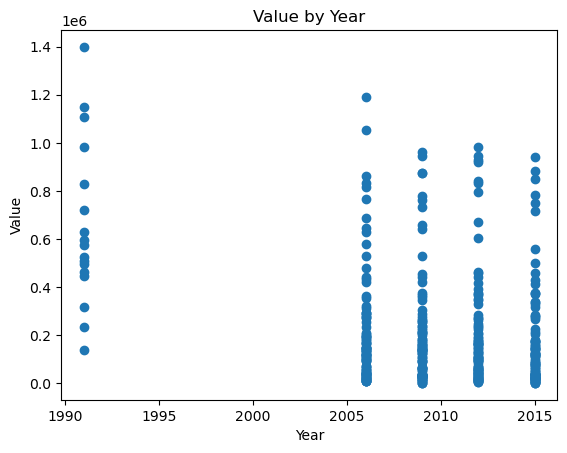

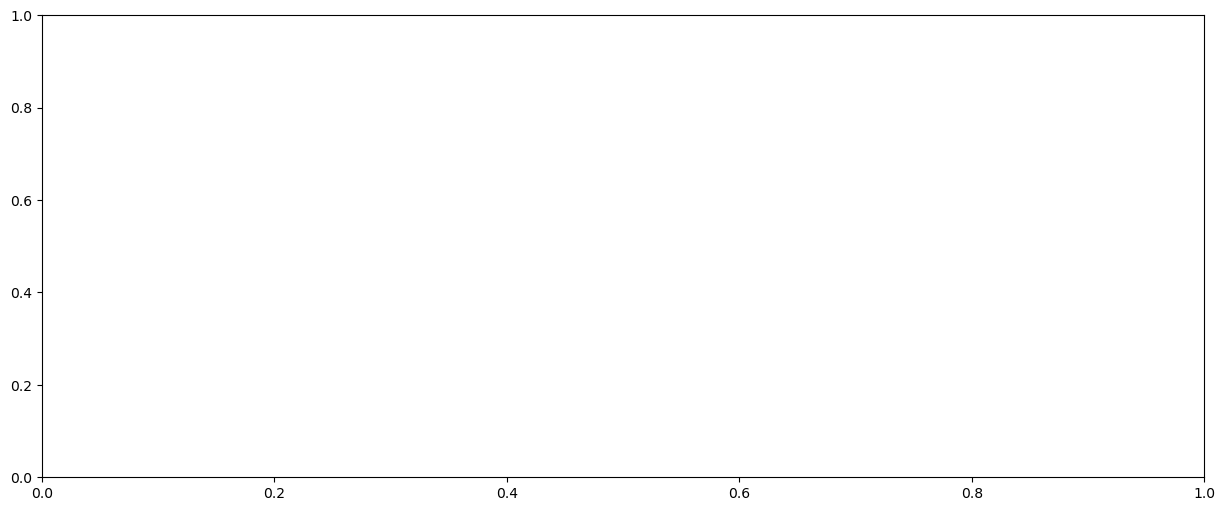

In [77]:
plt.scatter(x=df['Year'], y=df['value'])
plt.title('Value by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.subplots(figsize=(15, 6))

plt.show()

<AxesSubplot:xlabel='Year', ylabel='value'>

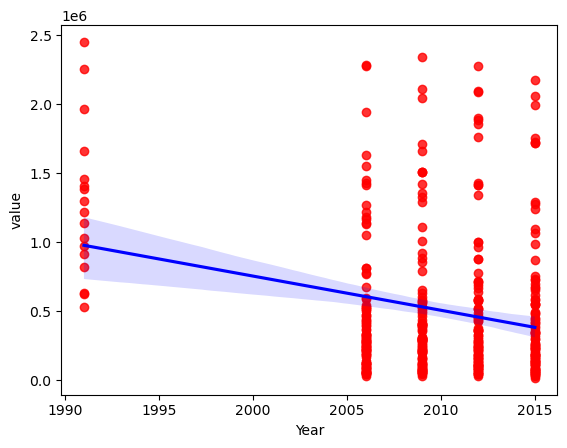

In [47]:
sns.regplot(x='Year', y='value', data=df, scatter_kws={"color":"red"}, line_kws={"color": "blue"})

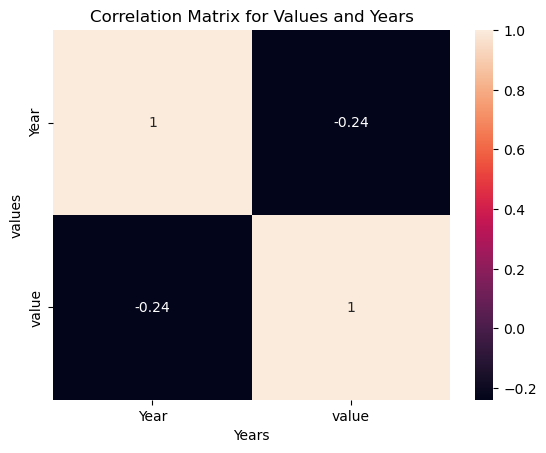

In [49]:
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Values and Years')
plt.xlabel('Years')
plt.ylabel('values')

plt.show()

In [50]:
df.corr(method='pearson')

,Year,value
Year,1.000000,-0.238732
value,-0.238732,1.000000


# Magnitude of Subsistence Poor Population

In [22]:
df = pd.read_csv(r"C:\Users\Windows10\OneDrive - ust.edu.ph\Ust Engineering\Titles & Certifications\Thinking Machines\Datasets\Magnitude of Subsistence Poor Population.csv")

In [23]:
df.head()

,Unnamed: 0,Variable,Year,province,value,adm_level,region,unit
0,30,Magnitude of Subsistence Poor Population,1991,1st District,NaN,District,NCR,population
1,31,Magnitude of Subsistence Poor Population,2006,1st District,"22,528",District,NCR,population
2,32,Magnitude of Subsistence Poor Population,2009,1st District,0,District,NCR,population
3,33,Magnitude of Subsistence Poor Population,2012,1st District,"8,902",District,NCR,population
4,34,Magnitude of Subsistence Poor Population,2015,1st District,"24,855",District,NCR,population


In [24]:
df = df.drop('Unnamed: 0', axis=1)
df = df.dropna(subset=['region'])
df = df.dropna(subset=['value'])
df = df.drop(df[df['region'] == 'Philippines'].index)
df.head()

,Variable,Year,province,value,adm_level,region,unit
1,Magnitude of Subsistence Poor Population,2006,1st District,"22,528",District,NCR,population
2,Magnitude of Subsistence Poor Population,2009,1st District,0,District,NCR,population
3,Magnitude of Subsistence Poor Population,2012,1st District,"8,902",District,NCR,population
4,Magnitude of Subsistence Poor Population,2015,1st District,"24,855",District,NCR,population
6,Magnitude of Subsistence Poor Population,2006,2nd District,"13,020",District,NCR,population


In [25]:
df.to_csv('Magnitude of Subsistence Poor Population.csv')

In [74]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Variable - 0.0%
Year - 0.0%
province - 0.0%
value - 0.0%
adm_level - 0.0%
region - 0.0%
unit - 0.0%


In [75]:
df['value'] = df['value'].apply(lambda x: int(x.replace(',', '')))

In [76]:
df['Variable'] = df['Variable'].astype(str)
df['province'] = df['province'].astype(str)
df['value'] = df['value'].astype(int)
df['adm_level'] = df['adm_level'].astype(str)
df['region'] = df['region'].astype(str)

In [78]:
df.dtypes

Variable     object
Year          int64
province     object
value         int32
adm_level    object
region       object
unit         object
dtype: object

TypeError: __init__() got an unexpected keyword argument 'region'

<Figure size 50000x600 with 0 Axes>

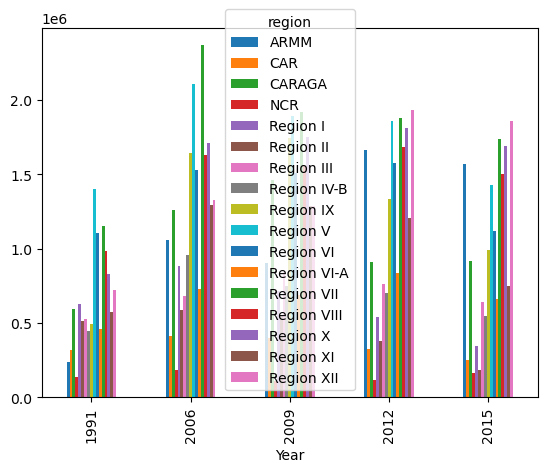

In [79]:
# Group the DataFrame by year and region
grouped_df = df.groupby(['Year', 'region'])['value'].sum().unstack()

# Set the figure size
plt.figure(figsize=(500, 6))

# Create a grouped bar chart
ax = grouped_df.plot(kind='bar')
ax.legend(region='lower right')
# Add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Values by Year and Region')

# Display the chart
plt.show()

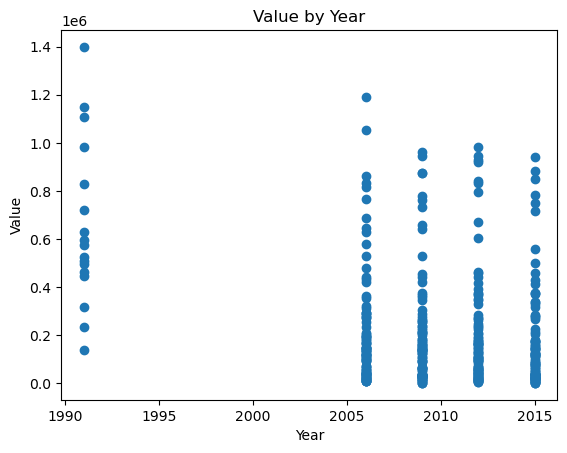

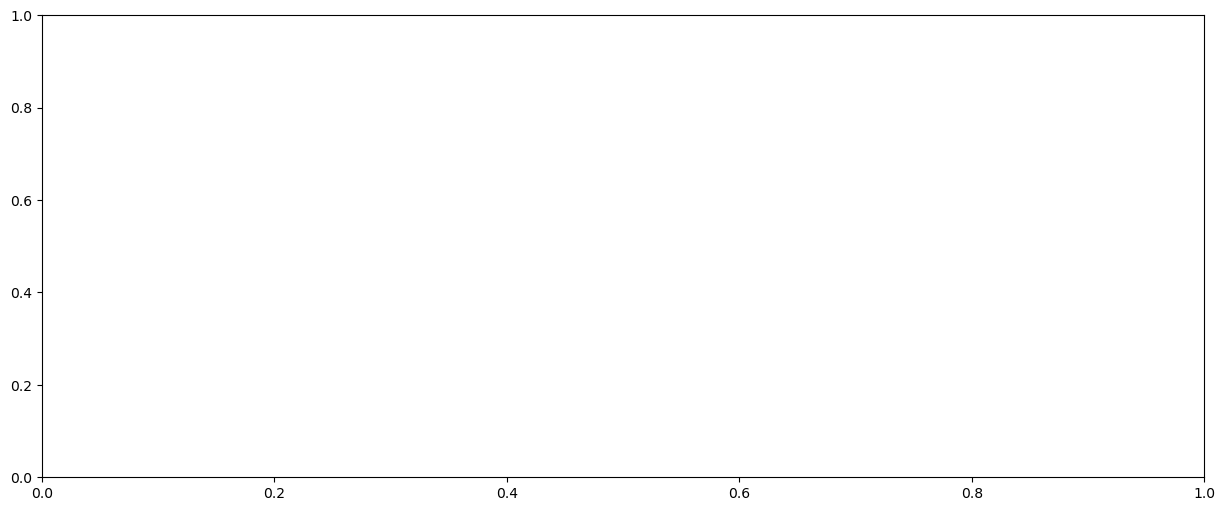

In [80]:
plt.scatter(x=df['Year'], y=df['value'])
plt.title('Value by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.subplots(figsize=(15, 6))

plt.show()

<AxesSubplot:xlabel='Year', ylabel='value'>

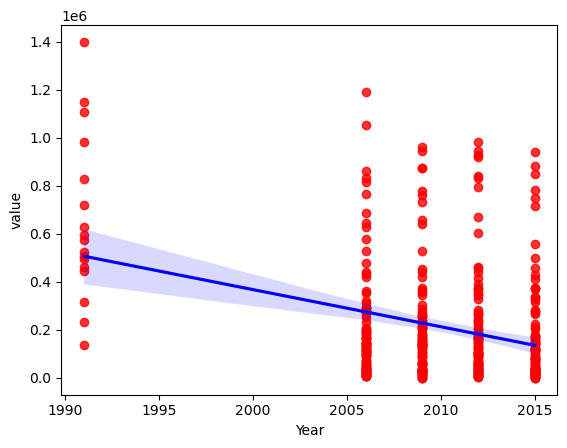

In [81]:
sns.regplot(x='Year', y='value', data=df, scatter_kws={"color":"red"}, line_kws={"color": "blue"})

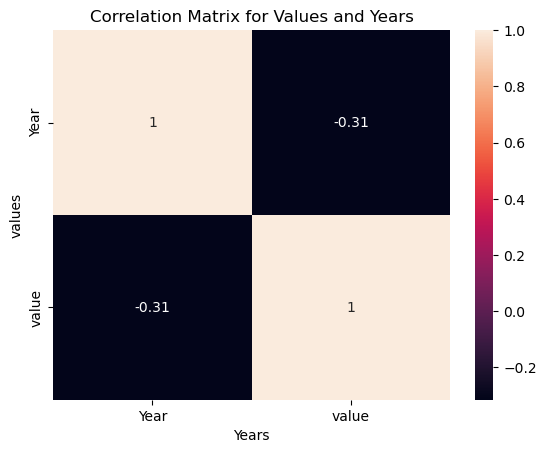

In [82]:
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Values and Years')
plt.xlabel('Years')
plt.ylabel('values')

plt.show()

In [83]:
df.corr(method='pearson')

,Year,value
Year,1.000000,-0.314683
value,-0.314683,1.000000


# Poverty Incidence among Families

In [26]:
df = pd.read_csv(r"C:\Users\Windows10\OneDrive - ust.edu.ph\Ust Engineering\Titles & Certifications\Thinking Machines\Datasets\Poverty Incidence among Families.csv")

In [27]:
df.head()

,Unnamed: 0,Variable,Year,province,value,adm_level,region,unit
0,5,Poverty Incidence among Families (%),1991,1st District,NaN,District,NCR,%
1,6,Poverty Incidence among Families (%),2006,1st District,2.7,District,NCR,%
2,7,Poverty Incidence among Families (%),2009,1st District,3.2,District,NCR,%
3,8,Poverty Incidence among Families (%),2012,1st District,3.6,District,NCR,%
4,9,Poverty Incidence among Families (%),2015,1st District,3.5,District,NCR,%


In [28]:
df = df.drop('Unnamed: 0', axis=1)
df = df.dropna(subset=['region'])
df = df.dropna(subset=['value'])
df = df.drop(df[df['region'] == 'Philippines'].index)
df.head()

,Variable,Year,province,value,adm_level,region,unit
1,Poverty Incidence among Families (%),2006,1st District,2.7,District,NCR,%
2,Poverty Incidence among Families (%),2009,1st District,3.2,District,NCR,%
3,Poverty Incidence among Families (%),2012,1st District,3.6,District,NCR,%
4,Poverty Incidence among Families (%),2015,1st District,3.5,District,NCR,%
6,Poverty Incidence among Families (%),2006,2nd District,3.2,District,NCR,%


In [29]:
df.to_csv('Poverty Incidence among Families.csv')

In [88]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Variable - 0.0%
Year - 0.0%
province - 0.0%
value - 0.0%
adm_level - 0.0%
region - 0.0%
unit - 0.0%


In [89]:
df.dtypes

Variable      object
Year           int64
province      object
value        float64
adm_level     object
region        object
unit          object
dtype: object

TypeError: __init__() got an unexpected keyword argument 'region'

<Figure size 800x600 with 0 Axes>

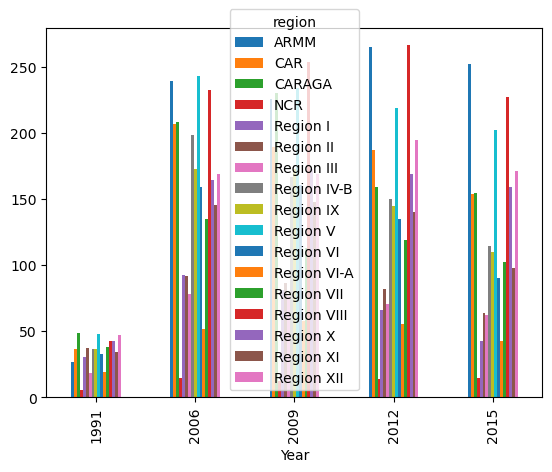

In [91]:
# Group the DataFrame by year and region
grouped_df = df.groupby(['Year', 'region'])['value'].sum().unstack()

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a grouped bar chart
ax = grouped_df.plot(kind='bar')
ax.legend(region='lower right')
# Add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Values by Year and Region')

# Display the chart
plt.show()

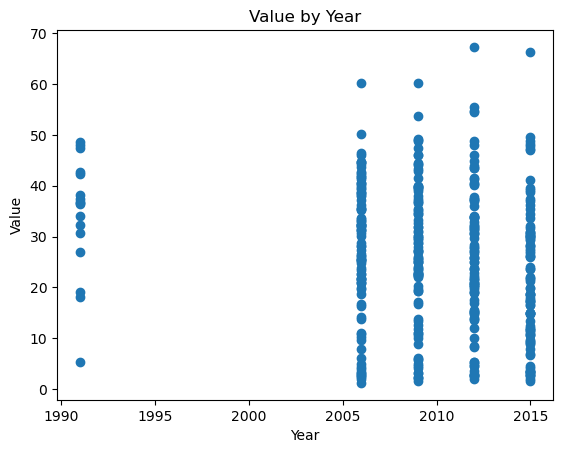

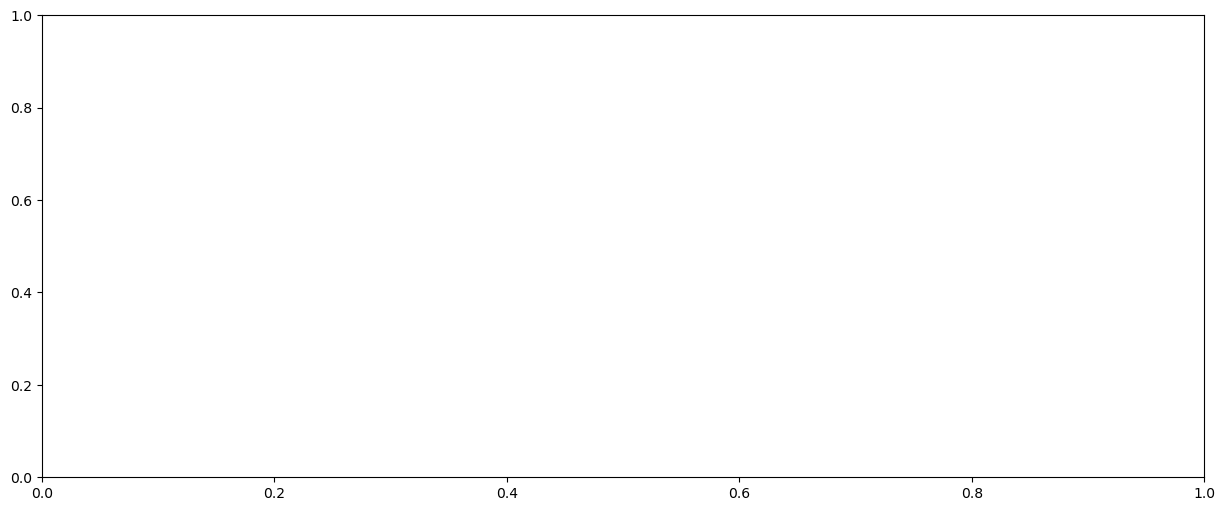

In [92]:
plt.scatter(x=df['Year'], y=df['value'])
plt.title('Value by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.subplots(figsize=(15, 6))

plt.show()

<AxesSubplot:xlabel='Year', ylabel='value'>

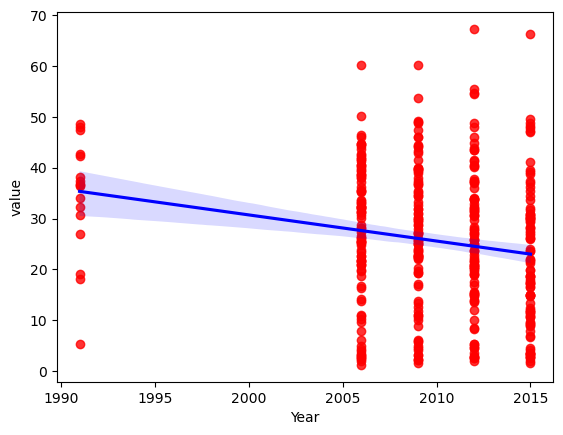

In [93]:
sns.regplot(x='Year', y='value', data=df, scatter_kws={"color":"red"}, line_kws={"color": "blue"})

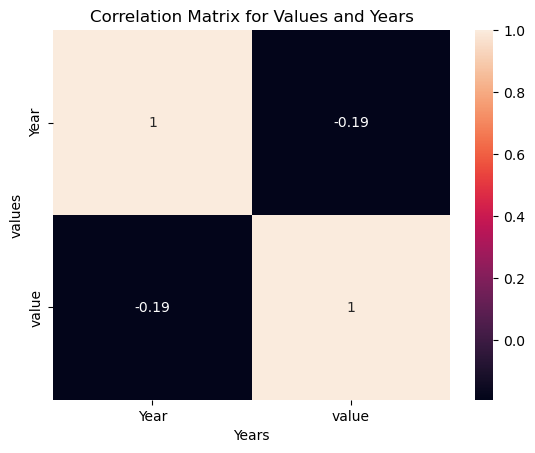

In [94]:
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Values and Years')
plt.xlabel('Years')
plt.ylabel('values')

plt.show()

In [95]:
df.corr(method='pearson')

,Year,value
Year,1.000000,-0.191692
value,-0.191692,1.000000


# Poverty Incidence among Populations

In [30]:
df = pd.read_csv(r"C:\Users\Windows10\OneDrive - ust.edu.ph\Ust Engineering\Titles & Certifications\Thinking Machines\Datasets\Poverty Incidence among Population.csv")

In [31]:
df.head()

,Unnamed: 0,Variable,Year,province,value,adm_level,region,unit
0,15,Poverty Incidence among Population (%),1991,1st District,NaN,District,NCR,%
1,16,Poverty Incidence among Population (%),2006,1st District,4.9,District,NCR,%
2,17,Poverty Incidence among Population (%),2009,1st District,5.1,District,NCR,%
3,18,Poverty Incidence among Population (%),2012,1st District,6.2,District,NCR,%
4,19,Poverty Incidence among Population (%),2015,1st District,5.1,District,NCR,%


In [32]:
df = df.drop('Unnamed: 0', axis=1)
df = df.dropna(subset=['region'])
df = df.dropna(subset=['value'])
df = df.drop(df[df['region'] == 'Philippines'].index)
df.head()

,Variable,Year,province,value,adm_level,region,unit
1,Poverty Incidence among Population (%),2006,1st District,4.9,District,NCR,%
2,Poverty Incidence among Population (%),2009,1st District,5.1,District,NCR,%
3,Poverty Incidence among Population (%),2012,1st District,6.2,District,NCR,%
4,Poverty Incidence among Population (%),2015,1st District,5.1,District,NCR,%
6,Poverty Incidence among Population (%),2006,2nd District,4.9,District,NCR,%


In [33]:
df.to_csv('Poverty Incidence among Population.csv')

In [99]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Variable - 0.0%
Year - 0.0%
province - 0.0%
value - 0.0%
adm_level - 0.0%
region - 0.0%
unit - 0.0%


In [100]:
df.dtypes

Variable      object
Year           int64
province      object
value        float64
adm_level     object
region        object
unit          object
dtype: object

TypeError: __init__() got an unexpected keyword argument 'region'

<Figure size 800x600 with 0 Axes>

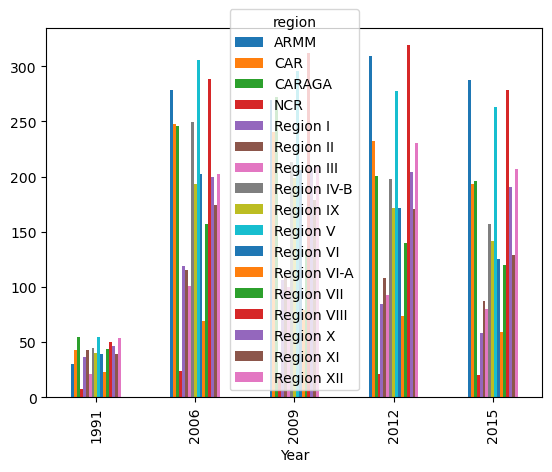

In [101]:
# Group the DataFrame by year and region
grouped_df = df.groupby(['Year', 'region'])['value'].sum().unstack()

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a grouped bar chart
ax = grouped_df.plot(kind='bar')
ax.legend(region='lower right')
# Add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Values by Year and Region')

# Display the chart
plt.show()

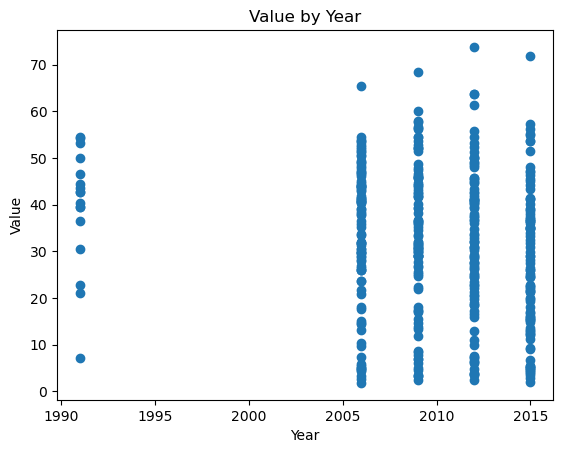

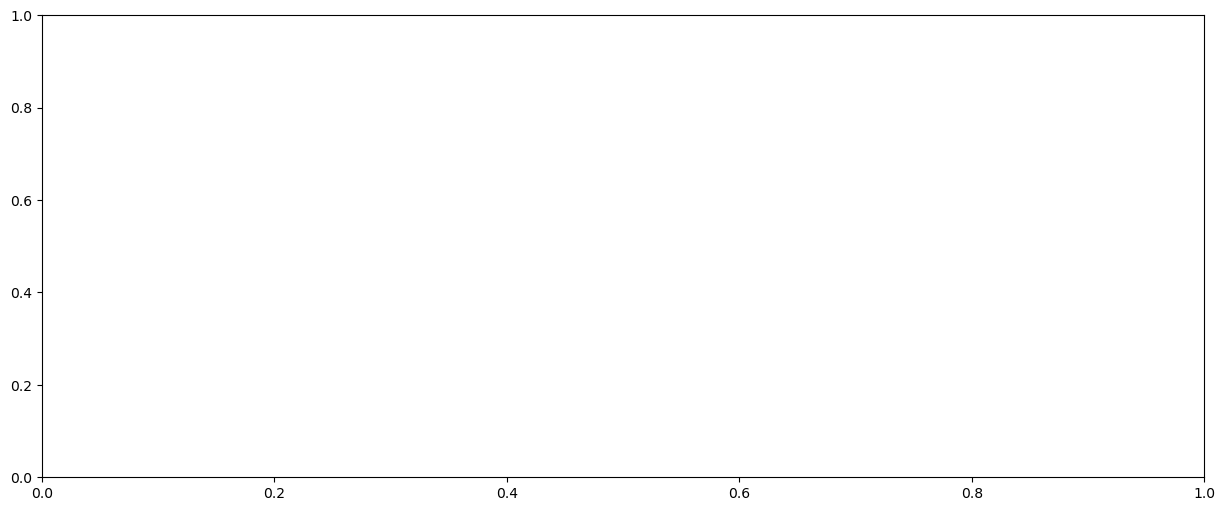

In [102]:
plt.scatter(x=df['Year'], y=df['value'])
plt.title('Value by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.subplots(figsize=(15, 6))

plt.show()

<AxesSubplot:xlabel='Year', ylabel='value'>

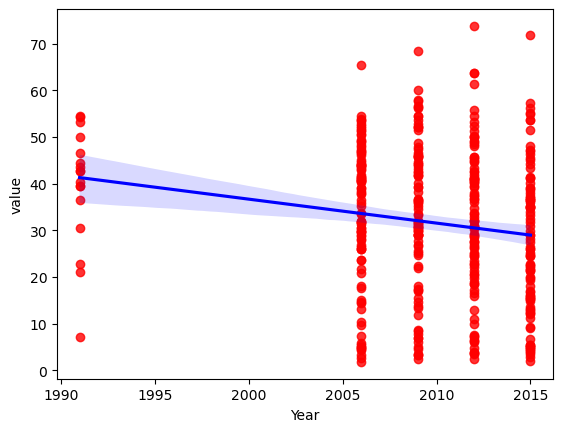

In [103]:
sns.regplot(x='Year', y='value', data=df, scatter_kws={"color":"red"}, line_kws={"color": "blue"})

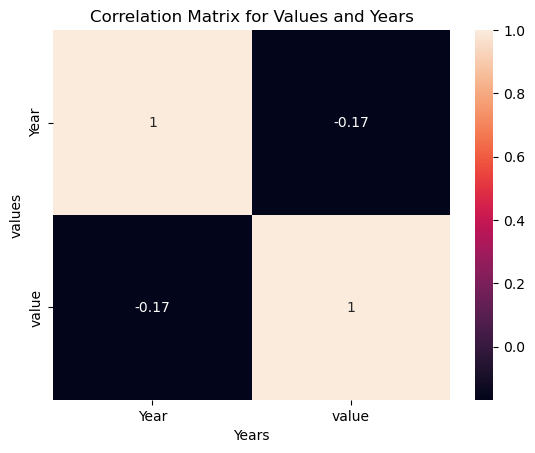

In [104]:
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Values and Years')
plt.xlabel('Years')
plt.ylabel('values')

plt.show()

In [105]:
df.corr(method='pearson')

,Year,value
Year,1.000000,-0.167597
value,-0.167597,1.000000


# Subsistence Incidence among Population

In [34]:
df = pd.read_csv(r"C:\Users\Windows10\OneDrive - ust.edu.ph\Ust Engineering\Titles & Certifications\Thinking Machines\Datasets\Subsistence Incidence among Population.csv")

In [35]:
df.head()

,Unnamed: 0,Variable,Year,province,value,adm_level,region,unit
0,25,Subsistence Incidence among Population (%),1991,1st District,NaN,District,NCR,%
1,26,Subsistence Incidence among Population (%),2006,1st District,1.4,District,NCR,%
2,27,Subsistence Incidence among Population (%),2009,1st District,0.0,District,NCR,%
3,28,Subsistence Incidence among Population (%),2012,1st District,0.5,District,NCR,%
4,29,Subsistence Incidence among Population (%),2015,1st District,1.6,District,NCR,%


In [36]:
df = df.drop('Unnamed: 0', axis=1)
df = df.dropna(subset=['region'])
df = df.dropna(subset=['value'])
df = df.drop(df[df['region'] == 'Philippines'].index)
df.head()

,Variable,Year,province,value,adm_level,region,unit
1,Subsistence Incidence among Population (%),2006,1st District,1.4,District,NCR,%
2,Subsistence Incidence among Population (%),2009,1st District,0.0,District,NCR,%
3,Subsistence Incidence among Population (%),2012,1st District,0.5,District,NCR,%
4,Subsistence Incidence among Population (%),2015,1st District,1.6,District,NCR,%
6,Subsistence Incidence among Population (%),2006,2nd District,0.3,District,NCR,%


In [37]:
df.to_csv('Subsistence Incidence among Population.csv')

In [109]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Variable - 0.0%
Year - 0.0%
province - 0.0%
value - 0.0%
adm_level - 0.0%
region - 0.0%
unit - 0.0%


In [110]:
df.dtypes

Variable      object
Year           int64
province      object
value        float64
adm_level     object
region        object
unit          object
dtype: object

TypeError: __init__() got an unexpected keyword argument 'region'

<Figure size 800x600 with 0 Axes>

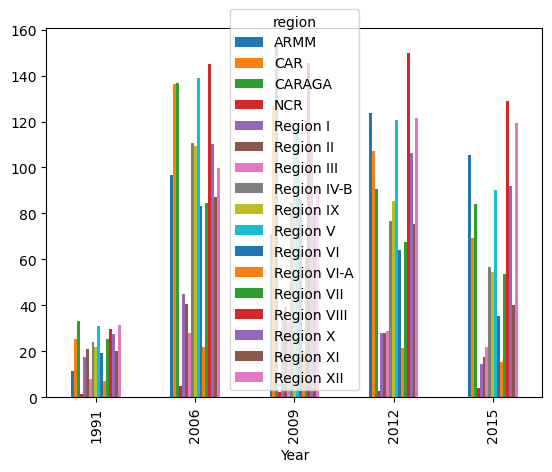

In [111]:
# Group the DataFrame by year and region
grouped_df = df.groupby(['Year', 'region'])['value'].sum().unstack()

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a grouped bar chart
ax = grouped_df.plot(kind='bar')
ax.legend(region='lower right')
# Add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Values by Year and Region')

# Display the chart
plt.show()

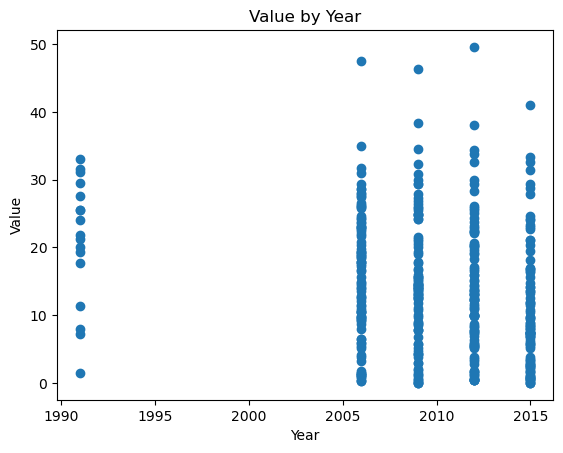

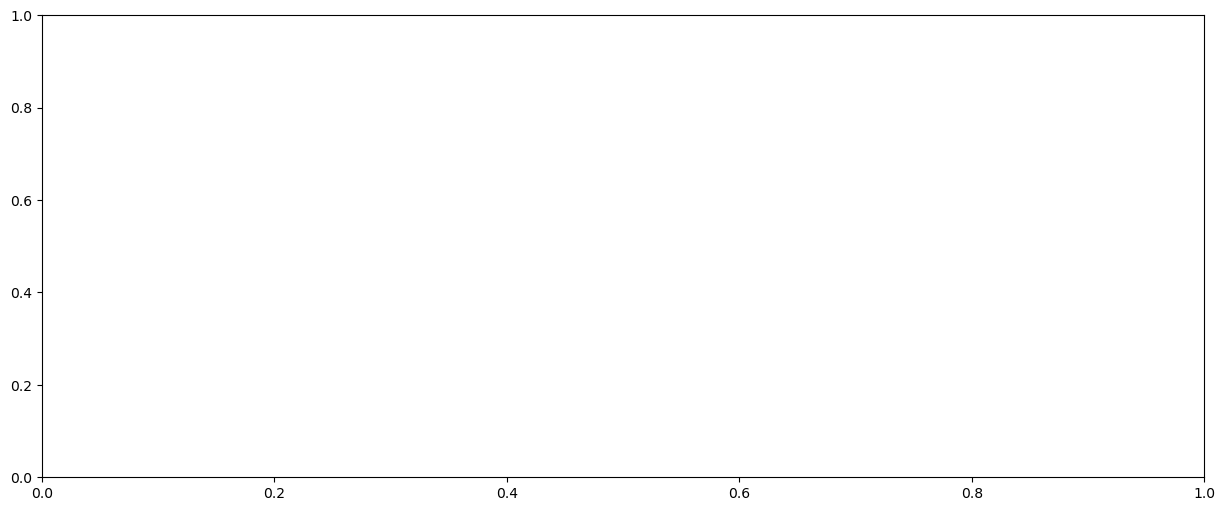

In [112]:
plt.scatter(x=df['Year'], y=df['value'])
plt.title('Value by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.subplots(figsize=(15, 6))

plt.show()

<AxesSubplot:xlabel='Year', ylabel='value'>

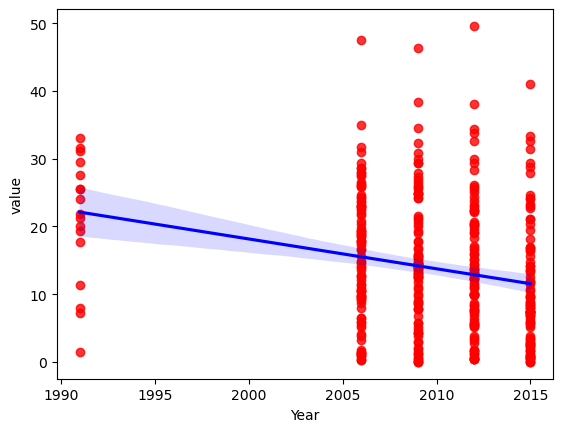

In [113]:
sns.regplot(x='Year', y='value', data=df, scatter_kws={"color":"red"}, line_kws={"color": "blue"})

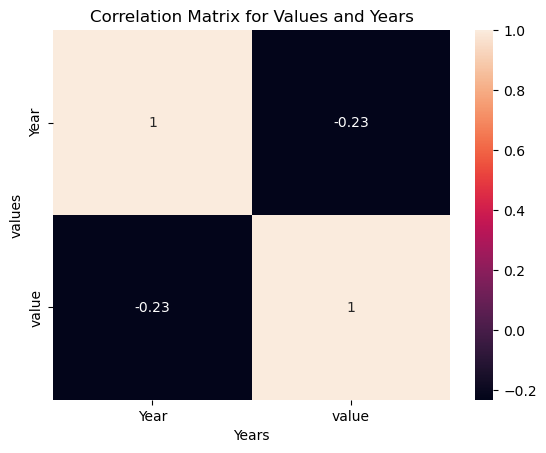

In [114]:
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Values and Years')
plt.xlabel('Years')
plt.ylabel('values')

plt.show()

In [115]:
df.corr(method='pearson')

,Year,value
Year,1.000000,-0.231965
value,-0.231965,1.000000
